# 1)

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the dataset
data = pd.read_csv('dataset.csv')

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values
# Alternatively, you can impute missing values with the mean
# data.fillna(data.mean(), inplace=True)

# Separate features (X) and target variable (y)
X = data.drop('target', axis=1)  
y = data['target']


# Scale numerical features using min-max scaling
numerical_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']  # Replace with actual column names
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Print the preprocessed dataset
print(X.head())
print(y.head())

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  
0  0.370968    0.0  0.0  0.333333  
1  0.564516    0.0  0.0  0.666667  
2  0.225806    1.0  0.0  0.666667  
3  0.129032    1.0  0.0  0.666667  
4  0.096774    1.0  0.0  0.666667  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


# 2)

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (212, 13) (212,)
Test set shape: (91, 13) (91,)


# 3)

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

# 4)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.8021978021978022
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


# 5)

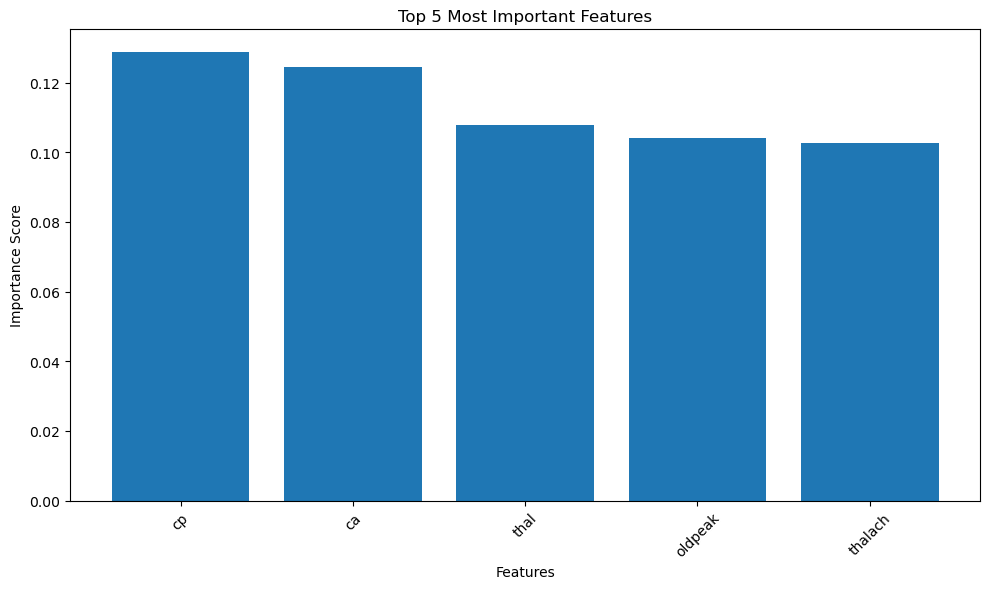

In [18]:
import matplotlib.pyplot as plt

# Get feature importances from the trained random forest classifier
importances = rf_classifier.feature_importances_

# Get the indices of the top 5 most important features
top_indices = importances.argsort()[-5:][::-1]

# Get the names of the top 5 most important features
top_features = X.columns[top_indices]

# Plot the feature importances in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_features, importances[top_indices])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 5 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier()

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86
F1 Score: 0.8431372549019608


# 7)

In [25]:
from sklearn.metrics import classification_report

# Create an instance of the random forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100,
                                            max_depth=5,
                                            min_samples_split=5,
                                            min_samples_leaf=4)

# Fit the best classifier on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the default model on the test set
y_pred_default = rf_classifier.predict(X_test)

# Evaluate the best model on the test set
y_pred_tuned = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics for the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

# Calculate evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

# Print the performance metrics for the default model
print("Default Model Performance:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)

# Print the best hyperparameters found by grid search
print("\nBest Hyperparameters:", best_params)

# Print the performance metrics for the tuned model
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

# Generate a classification report for the tuned model
classification_rep = classification_report(y_test, y_pred_tuned)
print("\nClassification Report:")
print(classification_rep)

Default Model Performance:
Accuracy: 0.8351648351648352
Precision: 0.8431372549019608
Recall: 0.86
F1 Score: 0.8514851485148515

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Model Performance:
Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86
F1 Score: 0.8431372549019608

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

